# Logistic Regression

## Sigmoid (Actication) Function

In [4]:
import warnings
warnings.filterwarnings('ignore')

### sigmoid( ) 정의

In [6]:
import numpy as np

def sigmoid(x):
    y_hat = 1 / (1 + np.exp(-x))
    return y_hat

### sigmoid( ) 실행

In [8]:
sigmoid(0)

0.5

In [9]:
sigmoid(100000000)

1.0

In [10]:
sigmoid(-100000000)

0.0

### sigmoid( ) 시각화

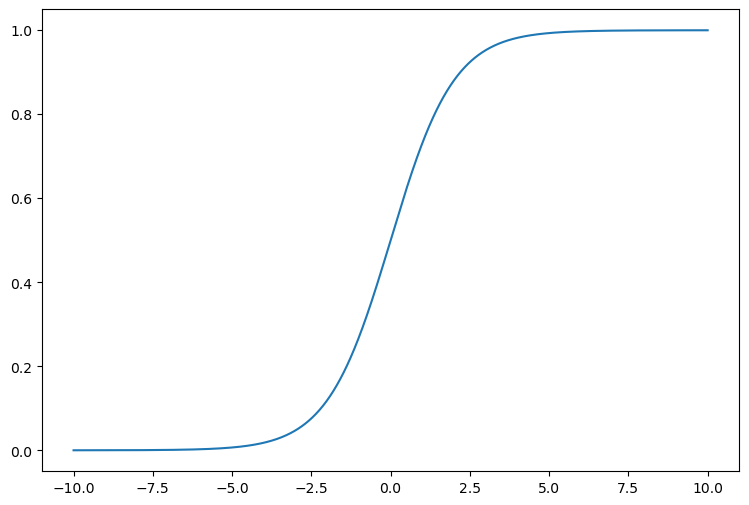

In [12]:
import matplotlib.pyplot as plt

n = np.linspace(-10.0, 10.0, 2000)

plt.figure(figsize = (9, 6))
plt.plot(n, sigmoid(n))
plt.show()

## Binary Classification - 분류

In [14]:
import warnings
warnings.filterwarnings('ignore')

### 실습용 데이터 설정

* pandas DataFrame
 * Default.csv

In [17]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Default.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [18]:
DF.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


### 탐색적 데이터 분석

#### 빈도분석

In [21]:
DF.default.value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

##### 분포 시각화

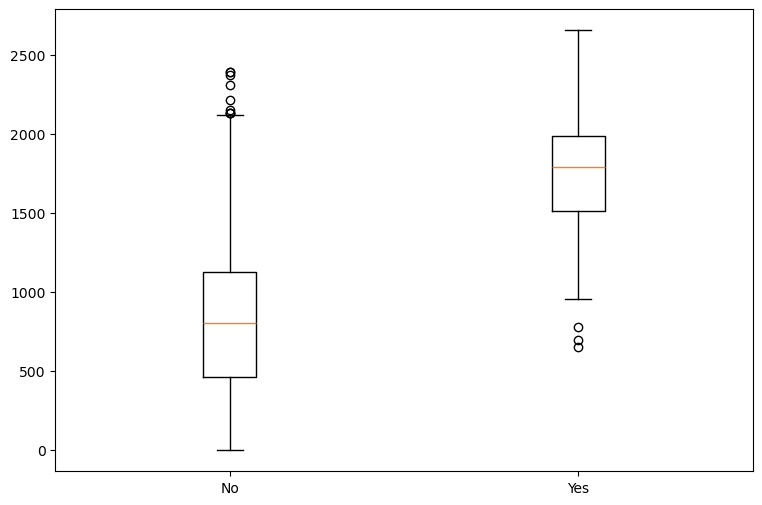

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.boxplot([DF[DF.default == 'No'].balance,
             DF[DF.default == 'Yes'].balance],
            labels = ['No', 'Yes'])
plt.show()

### Data Preprocessing

##### X, y

In [26]:
X = DF[['balance']]
y = DF['default']

##### Train & Test Split

* 7: 3

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7000, 1) (7000,)
Test Data :  (3000, 1) (3000,)


### Modeling

#### Train_Data로 모델 생성

In [32]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression()

#### Test_Data에 Model 적용

In [34]:
y_hat = Model_lr.predict(X_test)

* y_hat

In [36]:
y_hat 

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

### Model Validation

#### Confusion Matrix

* 'No'(상환) 기준

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix?

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If

In [40]:
confusion_matrix(y_test, y_hat)

array([[2888,    8],
       [  72,   32]], dtype=int64)

* 'Yes'(연체) 기준

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = ['Yes','No'])

array([[  32,   72],
       [   8, 2888]], dtype=int64)

#### Accuracy, Precision, Recall - 'No(상환)'

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'No'))
print(recall_score(y_test, y_hat, pos_label = 'No'))

0.9733333333333334
0.9756756756756757
0.9972375690607734


#### Accuracy, Precision, Recall - 'Yes(연체)'
- 예측목표가 연체자를 예측하는 것으로 목적이 명료하므로, yes기준 recall이 핵심 평가지표가 된다.

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Yes'))
print(recall_score(y_test, y_hat, pos_label = 'Yes'))

0.9733333333333334
0.8
0.3076923076923077


#### 4) F1_Score - 'No(상환)'

In [48]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'No')

0.9863387978142076

#### 5) F1_Score - 'Yes(연체)'

In [50]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'Yes')

0.4444444444444444

#### Classification Report

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['No', 'Yes'],
                            digits = 5))

              precision    recall  f1-score   support

          No    0.97568   0.99724   0.98634      2896
         Yes    0.80000   0.30769   0.44444       104

    accuracy                        0.97333      3000
   macro avg    0.88784   0.65246   0.71539      3000
weighted avg    0.96959   0.97333   0.96755      3000



## Cross Entropy Error
* 서로 다른 사건의 확률을 곱하여 Entropy를 계산
* y : 실제값, y_hat : 예측값(can be incorrect)
* y를 Cross-Entropy의 가중치로 적용
* Binary Cross-Entropy Error = –y * log(y_hat) – (1 - y) * log(1 - y_hat)
* Categorical Cross-Entropy Error = –y * log(y_hat)

In [54]:
import warnings
warnings.filterwarnings('ignore')

### Information Theory


#### 발생 확률이 서로 다른 사건 A, B, C - Information Gain

* Information Gain(정보 이득량)
 * 자주 발생하지 않는 사건은 자주 발생하는 사건보다 전달하는 정보량이 많음
 * Information Gain(정보 이득량)은 정보의 희귀성(발생가능성)에 반비례
 * I(x) = –log(P(x))

In [57]:
# 각 사건이 발생할 확률
A = 0.9
B = 0.5
C = 0.1
# 가장 발생할 확률이 낮은 C가 정보량이 가장 높음
print('%.3f' % -np.log(A), '%.3f' % -np.log(B), '%.3f' % -np.log(C))

0.105 0.693 2.303


#### AlphaGo와 Apes의 바둑대결 승리 확률 - Degree of Surprise

* Degree of Surprise(놀람의 정도)
 * 예상하기 어려운 정보에 더 높은 가치를 매기는 것

In [59]:
Alphago = 0.999
Apes = 0.001
# 알파고가 이겼을 때 놀람의 정도보다, 침팬지가 이겼을 때 놀람의 정도가 더 크다.
print('%.3f' % -np.log(Alphago), '%.3f' % -np.log(Apes))

0.001 6.908


### Entropy

* 불확실성의 정도
 * Entropy = E(–log(P(x)))
* 확률변수의 평균 정보량(기댓값)
 * –sum(p(x) * log(p(x)))
* 불확실성(Entropy)이 낮으면 분류정확도가 높아짐

#### 승률이 비슷한 두팀의 Entropy

In [63]:
P1 = 0.5
P2 = 0.5

-P1 * np.log(P1) - P2 * np.log(P2)

0.6931471805599453

#### 승률 차이가 큰 두팀의 Entropy

In [65]:
P1 = 0.999
P2 = 0.001

-P1 * np.log(P1) - P2 * np.log(P2)

0.007907255112232087

### Cross Entropy

#### y = 1 vs. y_hat = 1

In [68]:
import numpy as np

y = 1
y_hat = 1

-y * np.log(y_hat)

-0.0

#### y = 1 vs. y_hat = 0.0001

In [70]:
y = 1
y_hat = 0.0001

-y * np.log(y_hat)

9.210340371976182

#### y = 0 vs. y_hat = 0

In [72]:
y = 0
y_hat = 0

-(1 - y) * np.log(1 - y_hat)

-0.0

#### y = 0 vs. y_hat = 0.9999

In [74]:
y = 0
y_hat = 0.9999

-(1 - y) * np.log(1 - y_hat)

9.210340371976294

# The End